In [ ]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
#importing the data
df=pd.read_csv("/content/Unemployment in India.csv")
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

In [ ]:
#printing all columns
print(df.to_string())

               Region         Date  Frequency   Estimated Unemployment Rate (%)   Estimated Employed   Estimated Labour Participation Rate (%)   Area
0      Andhra Pradesh   31-05-2019    Monthly                              3.65           11999139.0                                     43.24  Rural
1      Andhra Pradesh   30-06-2019    Monthly                              3.05           11755881.0                                     42.05  Rural
2      Andhra Pradesh   31-07-2019    Monthly                              3.75           12086707.0                                     43.50  Rural
3      Andhra Pradesh   31-08-2019    Monthly                              3.32           12285693.0                                     43.97  Rural
4      Andhra Pradesh   30-09-2019    Monthly                              5.17           12256762.0                                     44.68  Rural
5      Andhra Pradesh   31-10-2019    Monthly                              3.52           12017412.0

In [ ]:
# delete gtrailing spaces
df.columns = df.columns.str.strip()

In [ ]:
#printing all the info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


In [ ]:
#checking if any value is missing or null
print(df.isnull().sum())

Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64


In [ ]:
#dropping the empty columns
new_df=df.dropna()
print(new_df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

In [ ]:
#fixing the wrong date format
new_df[' Date']=pd.to_datetime(new_df[' Date'])
print(new_df)

             Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Partici

<ipython-input-23-3db49dba6112>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df[' Date']=pd.to_datetime(new_df[' Date'])
<ipython-input-23-3db49dba6112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[' Date']=pd.to_datetime(new_df[' Date'])


In [ ]:
#data of only 2019
x = new_df[(new_df[' Date'] >= pd.to_datetime("2019-01-01")) &
       (new_df[' Date'] < pd.to_datetime("2020-01-01"))]
print(x)

             Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
743     West Bengal 2019-08-31    Monthly                              7.27   
744     West Bengal 2019-09-30    Monthly                              7.79   
745     West Bengal 2019-10-31    Monthly                              7.83   
746     West Bengal 2019-11-30    Monthly                              6.61   
747     West Bengal 2019-12-31    Monthly                              7.24   

      Estimated Employed   Estimated Labour Partici

In [ ]:
#data of only 2020
y = new_df[(new_df[' Date'] > pd.to_datetime("2019-12-31")) &
       (new_df[' Date'] < pd.to_datetime("2021-01-01"))]
print(y)

             Region       Date  Frequency   Estimated Unemployment Rate (%)  \
8    Andhra Pradesh 2020-01-31    Monthly                              4.84   
9    Andhra Pradesh 2020-02-29    Monthly                              5.91   
10   Andhra Pradesh 2020-03-31    Monthly                              4.06   
11   Andhra Pradesh 2020-04-30    Monthly                             16.29   
12   Andhra Pradesh 2020-05-31    Monthly                             14.46   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Partici

MEAN UNEMPLOYMENT RATE IN 2019 = 9.399046511627906
MEAN UNEMPLOYMENT RATE IN 2020 = 15.10158064516129


<ipython-input-28-926fc10a61ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=rates, palette='Blues')


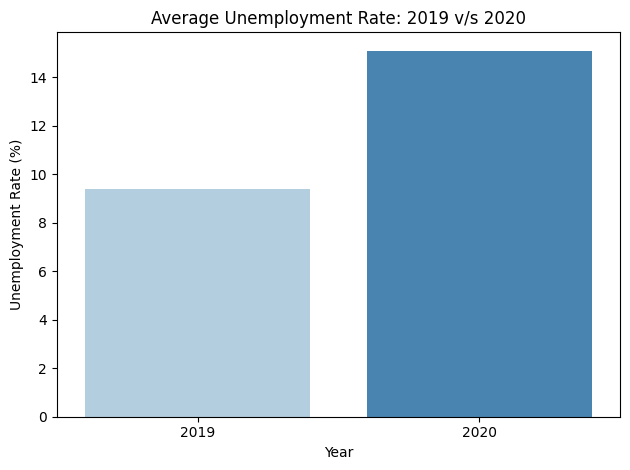

In [ ]:
#barplot of avg unemp rates in 2019 and 2020 using seaborn
mean_2019 = x[' Estimated Unemployment Rate (%)'].mean()
mean_2020 = y[' Estimated Unemployment Rate (%)'].mean()
print('MEAN UNEMPLOYMENT RATE IN 2019 =',mean_2019)
print('MEAN UNEMPLOYMENT RATE IN 2020 =',mean_2020)
# Prepare data for plotting
years = ['2019', '2020']
rates = [mean_2019, mean_2020]

# Plot
sns.barplot(x=years, y=rates, palette='Blues')
plt.title('Average Unemployment Rate: 2019 v/s 2020')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

<ipython-input-32-bbbb050ed36d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[' Date'] = pd.to_datetime(new_df[' Date'])
<ipython-input-32-bbbb050ed36d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = new_df[' Date'].dt.month_name()  # e.g., "April"
<ipython-input-32-bbbb050ed36d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

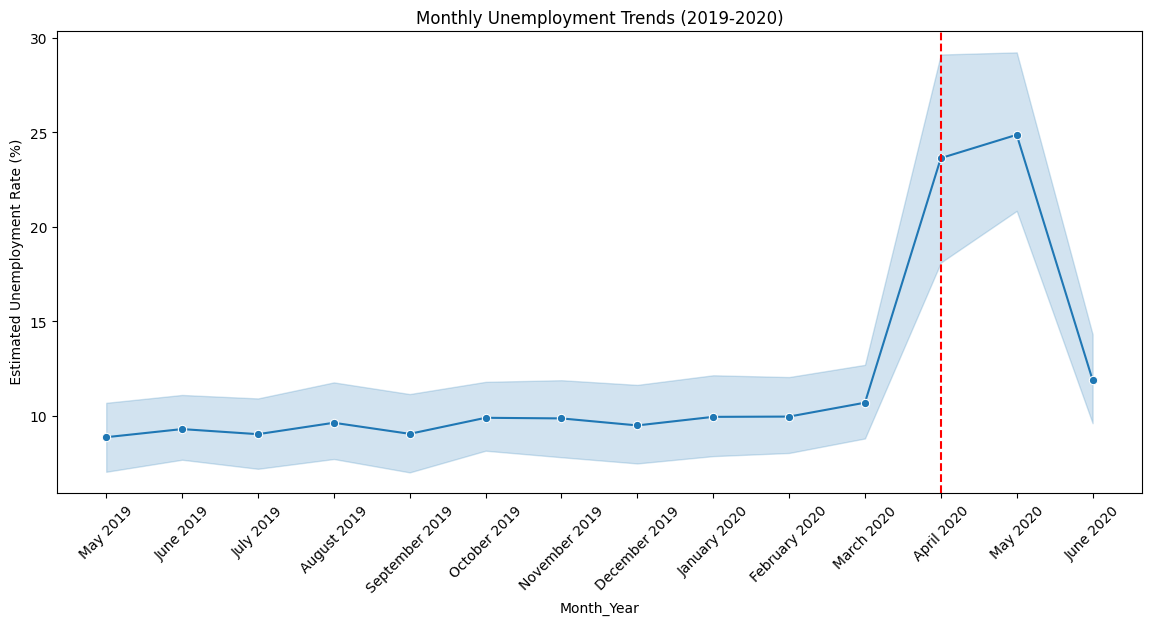

In [ ]:
#monthly analysis
new_df[' Date'] = pd.to_datetime(new_df[' Date'])
new_df['Month'] = new_df[' Date'].dt.month_name()  # e.g., "April"
new_df['Year'] = new_df[' Date'].dt.year           # e.g., 2020
new_df['Month_Year'] = new_df['Month'] + ' ' + new_df['Year'].astype(str)  # e.g., "April 2020"
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='Month_Year',
    y=' Estimated Unemployment Rate (%)',
    data=new_df.sort_values(' Date'),  # Ensure chronological order,
    marker='o'
)
plt.xticks(rotation=45)  # Rotate x-labels for readability
plt.axvline(x='April 2020', color='red', linestyle='--', label='Lockdown Start')
plt.title('Monthly Unemployment Trends (2019-2020)')
plt.show()

Area
Rural    44.464819
Urban    40.901365
Name:  Estimated Labour Participation Rate (%), dtype: float64


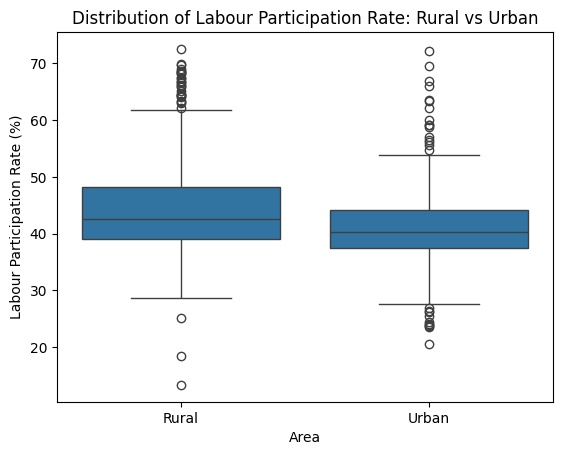

In [ ]:
grp = new_df.groupby('Area')[' Estimated Labour Participation Rate (%)'].mean()
print(grp)
sns.boxplot(x='Area', y=' Estimated Labour Participation Rate (%)', data=new_df)
plt.title("Distribution of Labour Participation Rate: Rural vs Urban")
plt.ylabel("Labour Participation Rate (%)")
plt.xlabel("Area")
plt.show()

In [ ]:
avg_emp=new_df.groupby('Region')[' Estimated Employed'].mean()
print(avg_emp)

Region
Andhra Pradesh      8.154093e+06
Assam               5.354772e+06
Bihar               1.236619e+07
Chandigarh          3.168312e+05
Chhattisgarh        4.303499e+06
Delhi               2.627513e+06
Goa                 2.263083e+05
Gujarat             1.140201e+07
Haryana             3.557072e+06
Himachal Pradesh    1.059824e+06
Jammu & Kashmir     1.799932e+06
Jharkhand           4.469240e+06
Karnataka           1.066712e+07
Kerala              4.425900e+06
Madhya Pradesh      1.111548e+07
Maharashtra         1.999020e+07
Meghalaya           6.897368e+05
Odisha              6.545747e+06
Puducherry          2.122781e+05
Punjab              4.539362e+06
Rajasthan           1.004106e+07
Sikkim              1.068807e+05
Tamil Nadu          1.226955e+07
Telangana           7.939663e+06
Tripura             7.170026e+05
Uttar Pradesh       2.809483e+07
Uttarakhand         1.390228e+06
West Bengal         1.719854e+07
Name:  Estimated Employed, dtype: float64


In [ ]:
#using numpy classifying unemp rate as normal or high
mean_rate = new_df[' Estimated Unemployment Rate (%)'].mean()

new_df['Unemp_Level'] = np.where(
    new_df[' Estimated Unemployment Rate (%)'] > mean_rate,
    'High',
    'Normal'
)
print(new_df)

             Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31    Monthly                              3.65   
1    Andhra Pradesh 2019-06-30    Monthly                              3.05   
2    Andhra Pradesh 2019-07-31    Monthly                              3.75   
3    Andhra Pradesh 2019-08-31    Monthly                              3.32   
4    Andhra Pradesh 2019-09-30    Monthly                              5.17   
..              ...        ...        ...                               ...   
749     West Bengal 2020-02-29    Monthly                              7.55   
750     West Bengal 2020-03-31    Monthly                              6.67   
751     West Bengal 2020-04-30    Monthly                             15.63   
752     West Bengal 2020-05-31    Monthly                             15.22   
753     West Bengal 2020-06-30    Monthly                              9.86   

      Estimated Employed   Estimated Labour Partici

<ipython-input-36-a560558d58a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Unemp_Level'] = np.where(


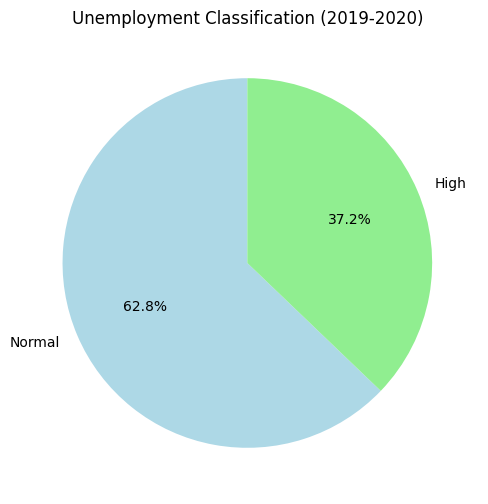

In [ ]:
# Count High vs Normal unemployment months
counts = new_df['Unemp_Level'].value_counts()

# Creatimg a pie chart
plt.figure(figsize=(6,6))
plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen'],  # Green (Normal) and Red (High)
        startangle=90)
plt.title('Unemployment Classification (2019-2020)')
plt.show()

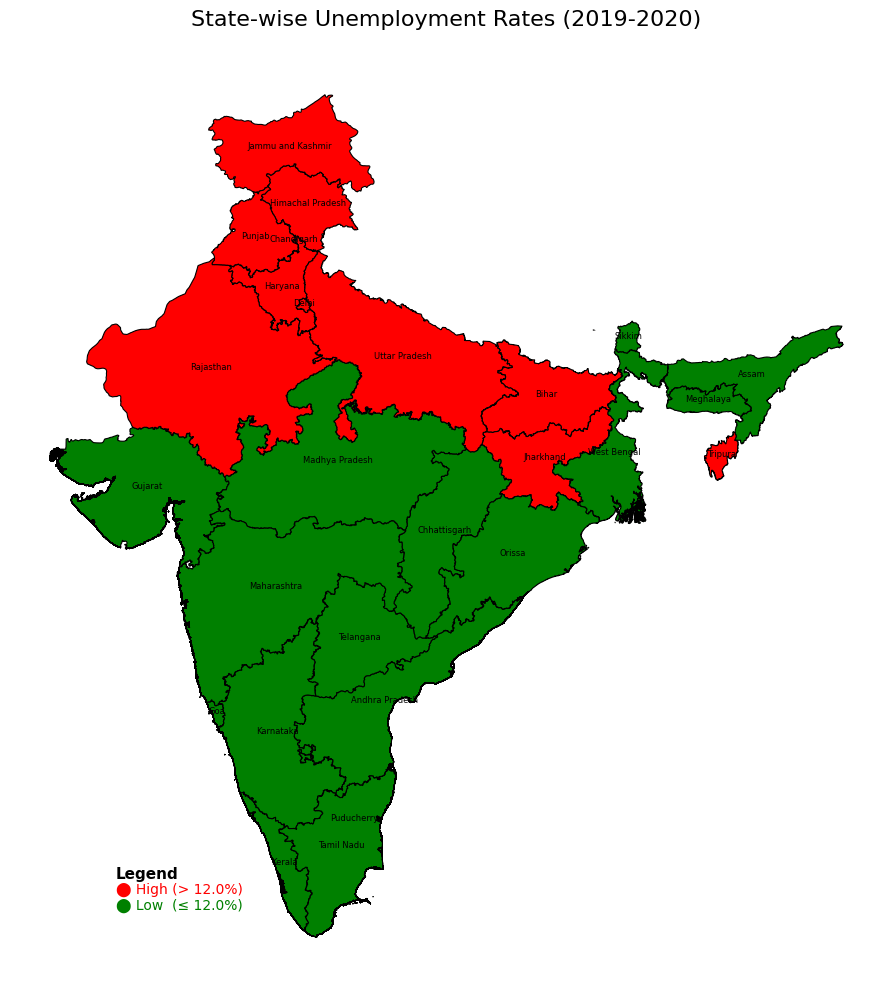

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load GeoJSON for Indian states
india = gpd.read_file('https://github.com/geohacker/india/raw/master/state/india_telengana.geojson')

# Compute mean unemployment rate by region
state_class = new_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Standardize state/region names
def standardize_names(name):
    name = str(name).lower()
    replacements = [
        ('&', 'and'),
        ('nct of ', ''),
        ('dadra and nagar haveli and daman and diu', 'dadra and nagar haveli'),
        ('odisha', 'orissa'),
        ('puducherry', 'pondicherry')
    ]
    for old, new in replacements:
        name = name.replace(old, new)
    return name.strip()

india['clean_name'] = india['NAME_1'].apply(standardize_names)
state_class['clean_name'] = state_class['Region'].apply(standardize_names)

# Merge unemployment data into GeoDataFrame
india = india.merge(state_class, on='clean_name', how='left')

# Drop states with missing unemployment data
india = india.dropna(subset=[' Estimated Unemployment Rate (%)'])

# Calculate national mean unemployment rate
national_mean = india[' Estimated Unemployment Rate (%)'].mean()

# Categorize states
india['Category'] = np.where(
    india[' Estimated Unemployment Rate (%)'] > national_mean,
    'High',
    'Low'
)

# Assign colors
color_map = {'High': 'red', 'Low': 'green'}
india['color'] = india['Category'].map(color_map)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
india.plot(color=india['color'], edgecolor='black', linewidth=0.8, ax=ax)

# Manual legend with better spacing
legend_x, legend_y = 70.5, 8.5  # Adjust these for your map
ax.text(legend_x, legend_y + 1.5, 'Legend', fontsize=11, weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

ax.text(legend_x, legend_y + 1.0, f'⬤ High (> {national_mean:.1f}%)', color='red', fontsize=10)
ax.text(legend_x, legend_y + 0.5, f'⬤ Low  (≤ {national_mean:.1f}%)', color='green', fontsize=10)

# Title and formatting
plt.title('State-wise Unemployment Rates (2019-2020)', fontsize=16, pad=20)
plt.axis('off')

# Optional: annotate state names
for idx, row in india.iterrows():
    ax.annotate(text=row['NAME_1'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                ha='center', fontsize=6, color='black')

plt.tight_layout()
plt.show()
